# 基于机器学习的NOMA系统安全性增强

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False




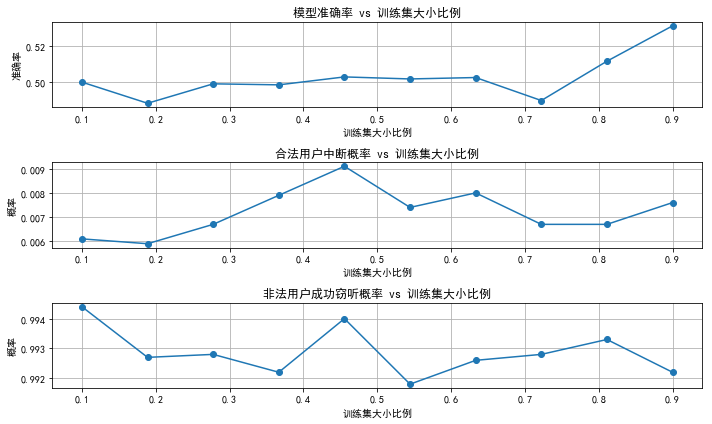

In [13]:
# 生成仿真数据
num_samples = 10000  # 样本数目
X = np.random.randn(num_samples, 3)  # 特征向量（信道增益、SNR、用户位置）
y = np.random.randint(0, 2, num_samples)  # 标签（中断事件）

train_sizes = np.linspace(0.1, 0.9, 10)  # 训练集大小比例
accuracies = []  # 模型准确率
legal_interrupt_probs = []  # 合法用户中断概率
eavesdropper_success_probs = []  # 非法用户成功窃听概率

threshold_legal = 1  # 合法用户容量阈值
threshold_eavesdropper = 0.5  # 非法用户容量阈值
snr_db = 20  # 信噪比（单位：dB）
snr = 10**(snr_db / 10)

for train_size in train_sizes:
    test_size = 1 - train_size  # 设置测试集大小比例
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    legal_interrupt_count = 0
    eavesdropper_success_count = 0
    
    for _ in range(num_samples):
        h_legal = np.abs(np.random.randn()) + 1j * np.random.randn()
        h_eavesdropper = np.abs(np.random.randn()) + 1j * np.random.randn()
        
        capacity_legal = np.log2(1 + (0.7 * snr * np.abs(h_legal)**2))
        capacity_eavesdropper = np.log2(1 + (0.3 * snr * np.abs(h_eavesdropper)**2))
        
        if capacity_legal < threshold_legal:
            legal_interrupt_count += 1
        if capacity_eavesdropper > threshold_eavesdropper:
            eavesdropper_success_count += 1
    
    legal_interrupt_probs.append(legal_interrupt_count / num_samples)
    eavesdropper_success_probs.append(eavesdropper_success_count / num_samples)

# 可视化结果
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(train_sizes, accuracies, marker='o')
plt.xlabel('训练集大小比例')
plt.ylabel('准确率')
plt.title('模型准确率 vs 训练集大小比例')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(train_sizes, legal_interrupt_probs, marker='o')
plt.xlabel('训练集大小比例')
plt.ylabel('概率')
plt.title('合法用户中断概率 vs 训练集大小比例')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(train_sizes, eavesdropper_success_probs, marker='o')
plt.xlabel('训练集大小比例')
plt.ylabel('概率')
plt.title('非法用户成功窃听概率 vs 训练集大小比例')
plt.grid(True)

plt.tight_layout()
plt.show()